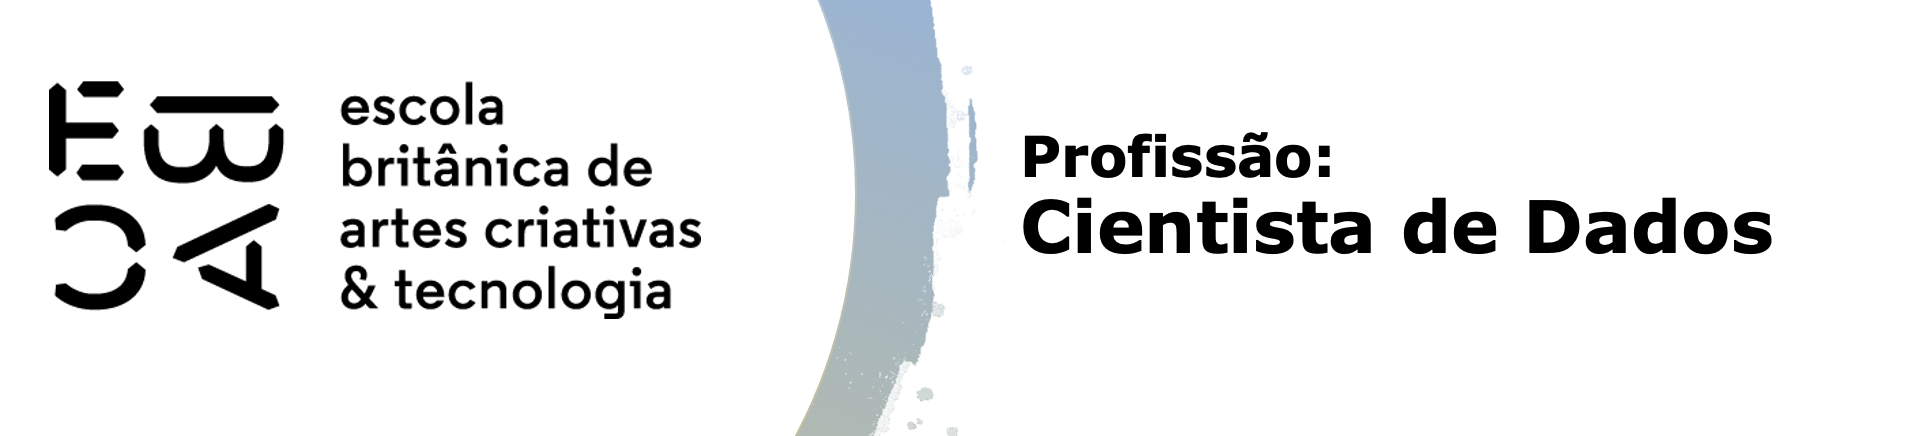

# Probabilidade

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
from scipy.stats import norm


## Gerando números pseudoaleatórios

Gerar números aleatórios tem uma infinidade de utilidades. Os números aleatórios mais comuns são os que possuem distribuição uniforme entre 0 e 1. Ou seja, são números contínuos, gerados pseudoaleatoriamente, com igual probabilidade de cair em cada segmento do intervalo que tenha mesmo tamanho.

O Numpy tem um pacote grande de números pseudoaleatórios, que geram valores uniformes.

In [11]:
np.random.rand(10)

array([0.53661834, 0.45445701, 0.26311471, 0.73698682, 0.06202681,
       0.23025901, 0.65597805, 0.51716509, 0.98443704, 0.99260365])

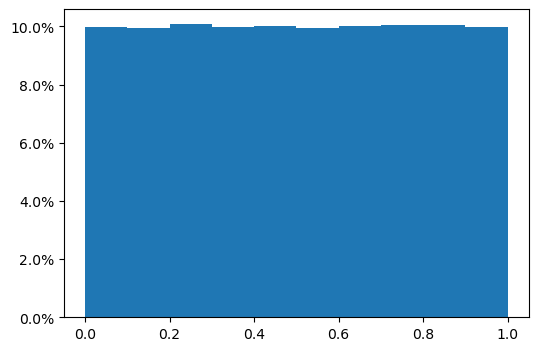

In [12]:
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(np.random.rand(100000), density=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(10))

## Gerando *Bernoullis* e binomiais

É bastante comum gerarmos variáveis aleatórias com distribuição *Bernoulli*, isto é, com resultados binários chamados arbitrariamente de sucesso e fracasso. Podemos fazer isso por exemplo para extrair uma amostra aleatória de uma base de dados

In [13]:
prob=.3

np.random.rand(10)<prob

array([False,  True, False, False, False, False, False, False, False,
       False])

A geração de variáveis binomiais é "simples" quando se parte de um conjunto de *Bernoullis* mas o Numpy tem uma função própria, que é capaz de gerar uma sequencia de números aleatórios com a distribuição binomial desejada.

In [14]:
np.random.binomial(20, .5, 100)

array([12, 15,  8,  9,  9, 10, 13,  8,  6, 12, 15, 11, 12,  7,  7, 10, 10,
        7, 12,  7,  9, 12,  7, 12,  8,  9, 13,  6,  8, 11,  8, 11,  9, 12,
       12,  8,  7, 14,  8, 10,  7, 11,  9, 10,  8, 15, 10, 13, 12, 13,  7,
        9, 10,  8, 11, 11,  9,  5,  9,  8, 12, 12,  8, 10, 12, 10, 11, 11,
       12,  9, 11, 14,  9, 10,  9, 12, 11, 10, 13, 13,  7, 10, 10,  9, 12,
        9, 13, 14,  8,  7, 11,  8,  8, 13,  6,  5, 10, 13, 14,  6])

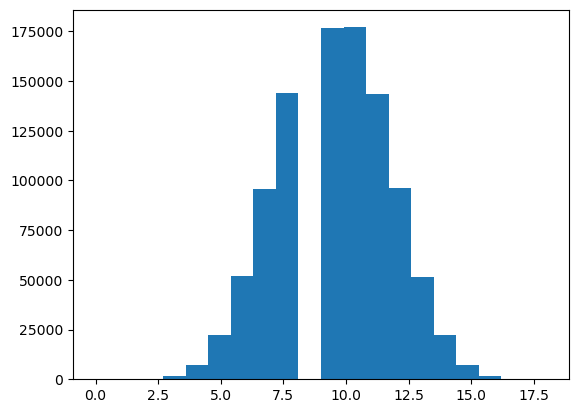

In [15]:
plt.hist(np.random.binomial(19, .5, 1000000), bins=20);

## Distribuição conjunta

As probabilidades de duas variáveis aleatórias podem ser 

In [19]:
df = pd.DataFrame({'Dado1':np.random.randint(1, 7, 10000),'Dado2':np.random.randint(1, 7, 10000)})
df['Soma'] = df['Dado1']+ df['Dado2']
df.head()

,Dado1,Dado2,Soma
0,5,4,9
1,2,3,5
2,3,4,7
3,3,3,6
4,6,3,9


## Independência

Em probabilidade, duas variáveis são independentes se $P(X1=x1|X2=x2) = P(X1=x1)$. Ou seja, $X2$ assumir um determinado valor não dá informação alguma sobre a probabilidade de $X1$ assumir algum valor. OBS: novamente estamos denotando variáveis aleatórias com letras maiúsculas, e valores específicos com letras minúsculas.

Vamos ilustrar com os resultados dos dois dados gerados acima. Por exemplo, $P(Dado2|Dado1=1)=P(Dado2)$. Ou seja, a probabilidade de o dado 2 assumir algum resultado é independente do resultado do dado 1.

<Axes: ylabel='Frequency'>

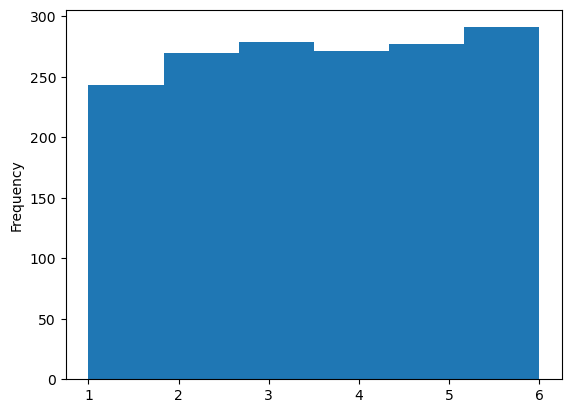

In [21]:
df[df['Dado1'] == 1].loc[:,'Dado2'].plot.hist(bins=6)

## Distribuição Condicional

Para variáveis que possuem alguma dependência, por exemplo, $X1$, o resultado do primeiro dado e $Y$, a soma dos dois dado, podemos nos interessar pela distribuição condicional. Isto é, se o primeiro dado resultar em um valor específico, qual a função de probabilidade da soma?

<Axes: ylabel='Frequency'>

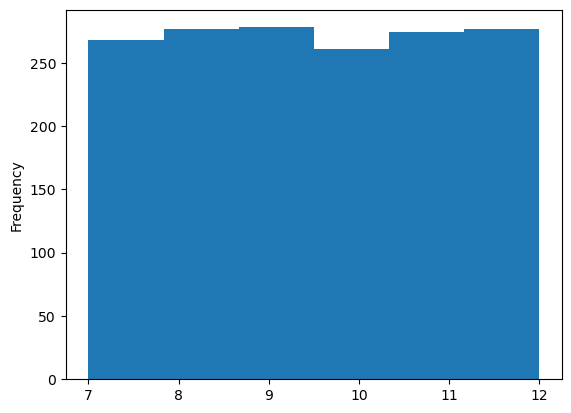

In [22]:
df[df['Dado1'] == 6].loc[:,'Soma'].plot.hist(bins=6)

### Exemplos

Usamos distribuições condicionais o tempo todo, quando usamos árvores de decisão ou regressão. A ideia é justamente encontrar esses padrões de dependência para tentar prever o valor de uma variável específica.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

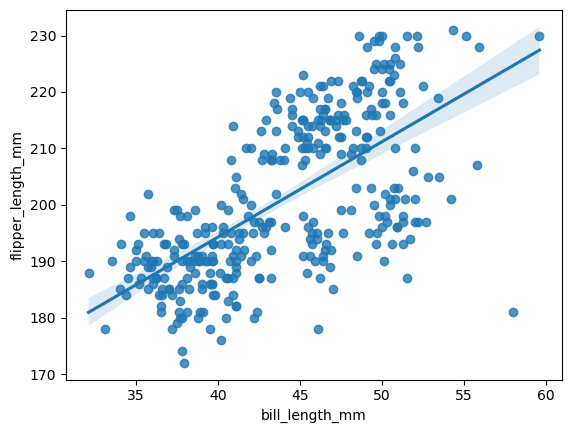

In [23]:
fig, ax = plt.subplots()

pg = sns.load_dataset('penguins')
sns.regplot(data=pg, x = 'bill_length_mm', y = 'flipper_length_mm', ax=ax)

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

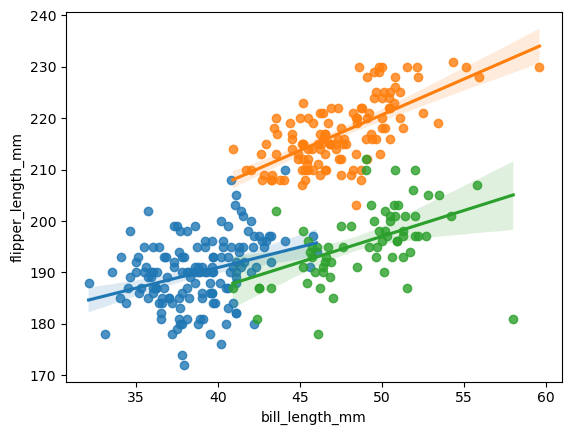

In [24]:
fig, ax = plt.subplots()

pg = sns.load_dataset('penguins')

sns.regplot(data=pg[pg['species'] == 'Adelie'], x = 'bill_length_mm', y = 'flipper_length_mm', ax=ax)
sns.regplot(data=pg[pg['species'] == 'Gentoo'], x = 'bill_length_mm', y = 'flipper_length_mm', ax=ax)
sns.regplot(data=pg[pg['species'] == 'Chinstrap'], x = 'bill_length_mm', y = 'flipper_length_mm', ax=ax)


## Função densidade de probabilidade

A função densidade de probabilidade, $f(x)$, descreve a 'lei' com que uma variável contínua é gerada. Embora a probabilidade de uma variável contínua assumir qualquer valor pontual seja zero ( $P(X=x)=0$ para qualquer x), a probabilidade de X ocorrer em um intervalo $[a, b]$, por exemplo, pode ser descrita pela área abaixo da curva nesse intervalo, ou seja, a integral $\int_{a}^{b} f(x) \,dx$.

Vamos fazer o gráfico de alguns exemplos para ilustrar:

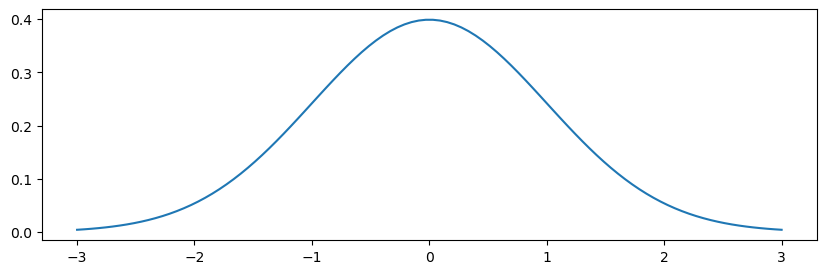

In [25]:
fig, ax = plt.subplots(figsize=(10,3))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y);

A probabilidade para valores entre 0,00 e 1,00 é de 34,13%


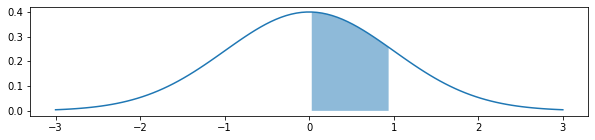

In [14]:
fig, ax = plt.subplots(figsize=(10,2))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y)

std_lim = 1 # 95% CI
low = 0
high = mu+std_lim*sigma

plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.text(low, 0, low, ha='center')
# plt.text(high, 0, high, ha='center')

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## Funções Distribuição Acumulada

A função distribuição acumulada, como o nome diz, é a versão acumulada da função densidade de probabilidade (ou da função de probabilidade para variáveis discretas). Ela dá a seguinte probabilidade: $F(x) = P(X<x)$ - nessa expressão, denotamos variável aleatória com letra maiúscula ($X$) e um valor constante arbitrário com letra minúscula ($x$).

Vamos ver isso graficamente:

A probabilidade para valores entre -inf e 3,00 é de 99,87%


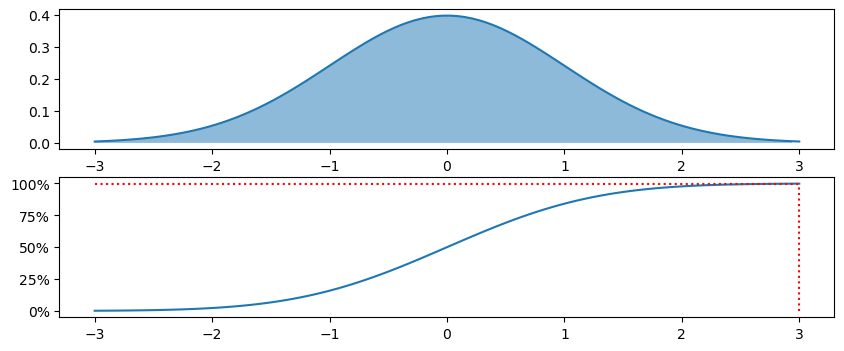

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(10,4))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
cdf = stats.norm.cdf(x, mu, sigma)
ax[1].plot(x, cdf)

low = -np.inf
high = 3


ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax[1].vlines(x=[high], 
             ymin=0, ymax=stats.norm.cdf(high, mu, sigma), 
             colors='r', linestyles='dotted')
ax[1].hlines(y=stats.norm.cdf(high, mu, sigma), 
             xmin=mu - 3*sigma, xmax=high, 
             colors='r', linestyles='dotted')

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

y = stats.norm.pdf(x, mu, sigma)
ax[0].plot(x, y)
ax[0].fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.text(low, 0, low, ha='center')
# plt.text(high, 0, high, ha='center')


É muito comum utilizar, em linguagens de programação, a função distribuição acumulada ($F(x)$) para se obter a probabilidade de uma variável aleatória estar em determinado intervalo. Para se obter a probabilidade da variável aleatória $X$ estar no intervalo $[a, b]$ fazemos $F(b)-F(a)$.

Por exemplo, vamos calcular a probabilidade de uma variável aleatória com distribuição Normal Padrão estar no intervalo $[-1,0]$ e mostrar isso no gráfico:

A probabilidade para valores entre -1,00 e 1,00 é de 68,27%


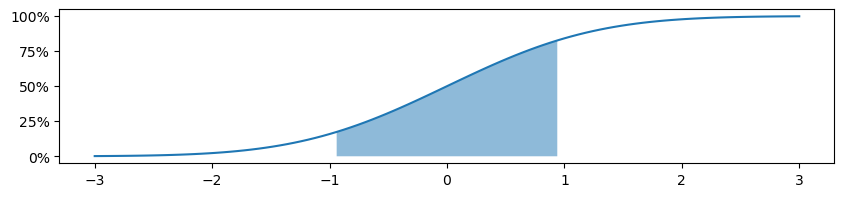

In [28]:
fig, ax = plt.subplots(figsize=(10,2))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.cdf(x, mu, sigma)
ax.plot(x, y)

std_lim = 0 # 95% CI
low = - 1
high = 1

plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.text(low, 0, low, ha='center')
# plt.text(high, 0, high, ha='center')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

A função distribuição acumulada é muito utilizada nas linguagens de programação. Quando temos uma variável aleatória com uma distribuição conhecida (e implementada no numpy, por exemplo), podemos obter a probabilidade de uma realização dessa variável pertencer a qualquer intervalo.

## Distribuição *t de studdent*

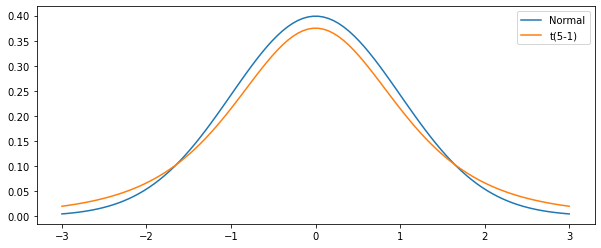

In [74]:
fig, ax = plt.subplots(figsize=(10,4))

n = 5
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, label='Normal')

t = stats.t.pdf(x, n-1)
ax.plot(x, t, label=f't({n}-1)');


ax.legend()
#

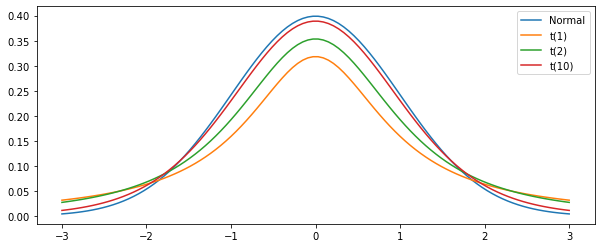

In [75]:
fig, ax = plt.subplots(figsize=(10,4))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, label='Normal')

for gl in ([1, 2, 10]):
    t = stats.t.pdf(x, gl)
    ax.plot(x, t, label=f't({gl})');


ax.legend()

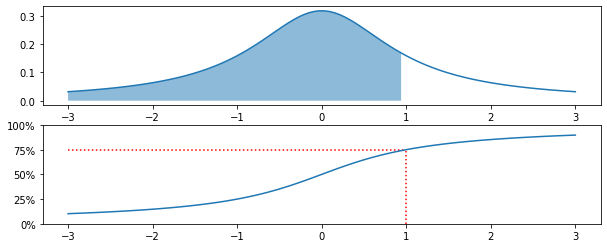

A probabilidade para valores entre -inf e 1,00 é de 75,0%


In [104]:
# Parâmetros da distribuição
mu = 0
variance = 1
gl = 1

#variância
sigma = math.sqrt(variance)

# Calcular probabilidade para o intervalo low e high
low = -np.inf
high = 1

# X distribuido uniformemente
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
cdf = stats.t.cdf(x, gl)*sigma+ mu

# Figura
fig, ax = plt.subplots(2, 1, figsize=(10,4))

# Plot da densidade
y = stats.t.pdf(x, gl)*sigma+ mu
ax[0].plot(x, y)
# Realçar a área entre LOW e HIGH
ax[0].fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Plot da distribuição acumulada
ax[1].plot(x, cdf)

# Formatar y da CDF com percentual
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1))
# Linhas de referência 
ax[1].vlines(x=[high], 
             ymin=0, ymax=stats.t.cdf(high, gl)*sigma+ mu, 
             colors='r', linestyles='dotted')
ax[1].hlines(y=stats.t.cdf(high, gl)*sigma+mu, 
             xmin=mu - 3*sigma, xmax=high, 
             colors='r', linestyles='dotted')
ax[1].set_ylim([0, 1])

# Calcular probabilidade entre LOW e HIGH
prob_area = stats.t.cdf(high, gl)*sigma - stats.t.cdf(low, gl)*sigma
plt.show()

print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.1%}'
      .replace('.',','));

## Explorando funções de probabilidade

Diversas funções de distribuição estão implementadas no SciPy em classes. O que significa 'estarem implementadas em classes'? Significa que, como em todos os objetos do Python, objetos dessas classes vão possuir atributos e métodos que serão úteis para as nossas atividades.

Vamos entender. Na célula abaixo, por exemplo, estamos chamando direto do SciPy a classe ```t```, e dela o método ```cdf```, com um parâmetro ```x```, que recebe lista, e um parâmetro ```gl``` que recebe um número. O método vai retornar um valor para cada elemento do ```x```.

In [33]:
from scipy import stats

gl=1
stats.t.cdf([-1, 0, 1, 2, 7], gl)

array([0.25      , 0.5       , 0.75      , 0.85241638, 0.95483276])

Na construção abaixo, estamos criando um objeto ```t1```, na classe ```stats.t```, com o parâmetro de graus de liberdade "congelado" com o valor 1.

Em seguida, estamos utilizando o método ```cdf``` para calcular a distribuição acumulada (*cumulative distribution function*) para cada valor da lista atribuída ao parâmetro ```x``` do método. 

In [34]:
t1 = stats.t(1)
t1.cdf([-1, 0, 1, 2])

array([0.25      , 0.5       , 0.75      , 0.85241638])

### Inversa da t
O SciPy possui ainda uma variedade de métodos. Por exemplo, possui o método ```ppf``` - de *percent point function*, que retorna o inverso da ```cdf```: inserindo uma probabilidade (ou um percentil), o método retorna o valor de ```x``` correspondente a esta probabilidade segundo a ```cdf```.

In [35]:
t1.ppf([.05, .25, .5, .75, .95])

array([-6.31375151e+00, -1.00000000e+00,  8.17756277e-17,  1.00000000e+00,
        6.31375151e+00])

### Outros métodos

Há também outros métodos que estimam parâmetros, geram valores aleatórios baseados na distribuição correspondente e realizam outras tarefas. Para saber mais, vale consultar a [documentação do scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

Claro que o SciPy possui uma diversidade de outras funções implementadas, como a Gama, F, Uniforme e diversas outras que podem vir a ser utilizadas nas aplicações estatísticas mais populares (e algumas talvez não tanto). Para saber mais, vale consultar a [documentação do scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Indicações de leitura

- "O andar do bêbado: Como o acaso determina nossas vidas" de Leonard Milodinow
[link](https://books.google.com.br/books/about/O_andar_do_b%C3%AAbado.html?id=WydVzQEACAAJ&redir_esc=y)
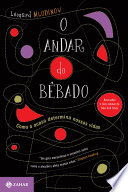

- "Estatística Básica" de P. A. Morettin e W. O. Bussab. [link](https://www.google.com.br/books/edition/ESTAT%C3%8DSTICA_B%C3%81SICA/vDhnDwAAQBAJ?hl=pt-BR&gbpv=0)
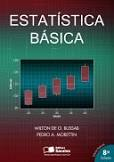